In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read dataset

df = pd.read_csv(r'C:\Users\USER\Downloads\car_age_price.csv')

In [3]:
# First 5 rows

df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
# Information in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
# Statistical summary

df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
# Check for null values

df.isnull().sum()

Year     0
Price    0
dtype: int64

In [7]:
# check for duplicates

df.duplicated().sum()

54

In [8]:
# Drop duplicated values

df.drop_duplicates(inplace=True)

In [9]:
# Shape of dataset after dropping duplicates

df.shape

(58, 2)

In [10]:
# check outliers (skewness method)

print('skewness value of Year: ',df['Year'].skew())
print('skewness value of Price: ',df['Price'].skew())

skewness value of Year:  0.0325135353633612
skewness value of Price:  0.4298811651053444


Skewness method : The skewness value should be within the range of -1 to 1 for a normal distribution,any major changes from this value may indicate the presence of outliers. Hence, there is no outliers in the dataset

# Linear Regression

In [11]:
# import Linear regression from sklearn library

from sklearn.linear_model import LinearRegression

In [12]:
# Define X and Y

X = df['Year'].values.reshape(-1, 1)
y = df['Price'].values

In [13]:
# Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [14]:
# Train the model

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

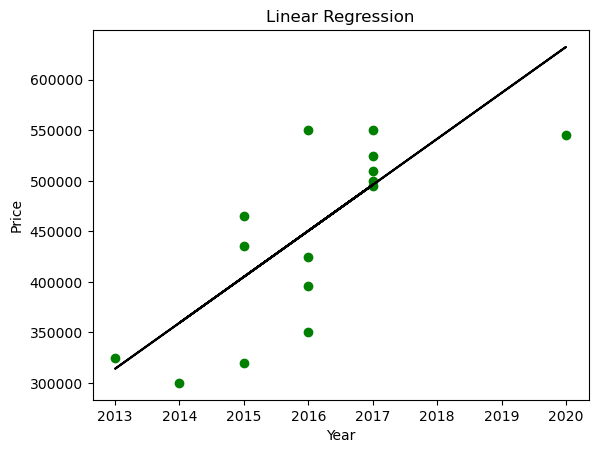

In [15]:
# Scatter plot of linear regression

y_pred = linear_reg.predict(X_test)
plt.scatter(X_test, y_test, color ='green',label ='Actual')
plt.plot(X_test, y_pred, color ='black')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.show()

In [16]:
# Evaluation Metrics For Regression: mean_absolute_error,r2_score and mean_squared_error metrics are used to check performance


from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
 
mean_absolute_error = mean_absolute_error(y_test,y_pred)  

r2_score = r2_score(y_test,y_pred)

mean_squared_error = mean_squared_error(y_test,y_pred)

 
print("Mean absolute error in Linear Regression :", mean_absolute_error)
print("r2_score in Linear Regression :",r2_score)
print("Mean squared error in Linear Regression :", mean_squared_error)

Mean absolute error in Linear Regression : 47666.3581208686
r2_score in Linear Regression : 0.5461573802565929
Mean squared error in Linear Regression : 3375343371.6182513


In [17]:
# Prediction of model price in 2022

model_price_2022 = linear_reg.predict([[2022]])
print('Model price in 2022 :',model_price_2022)

Model price in 2022 : [723468.30453257]


# Lasso Regression

In [18]:
# import Lasso regression from sklearn library

from sklearn.linear_model import Lasso

In [19]:
# Train the model

lasso_reg = Lasso(alpha = 1)
lasso_reg.fit(X_train, y_train)
y_pred1 = lasso_reg.predict(X_test)

In [20]:
# Evaluation Metrics For Regression: mean_absolute_error,r2_score and mean_squared_error metrics are used to check performance


from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
 
mean_absolute_error1 = mean_absolute_error(y_test,y_pred1)  

r2_score1 = r2_score(y_test,y_pred1)

mean_squared_error1 = mean_squared_error(y_test,y_pred1)

 
print("Mean absolute error in Lasso Regression :", mean_absolute_error1)
print("r2_score in Lasso Regression :",r2_score1)
print("Mean squared error in Lasso Regression :", mean_squared_error1)

Mean absolute error in Lasso Regression : 47666.29274787307
r2_score in Lasso Regression : 0.5461577821471992
Mean squared error in Lasso Regression : 3375340382.65526


In [21]:
# Prediction of model price in 2022

model_price_2022 = lasso_reg.predict([[2022]])
print('Model price in 2022 :',model_price_2022)

Model price in 2022 : [723466.92804533]


# Conclusion

r2_score in Linear Regression : 0.5461573802565929 ; r2_score in Lasso Regression : 0.5461577821471992

From the above values of r2_scores, lasso regression has a high r2_score value compared to linear regression. Hence, Lasso regression is performing better for the given dataset